Problem Set 02 :

++++++++++++++++++++++++++

A banking institution wants to develop a model that predicts whether a customer will subscribe to a term deposit or not based on their banking behaviour. They have collected a dataset of past customers with information about their demographics, account details, and whether they subscribed to a term deposit or not. The bank wants to build a model using Logistic Regression to predict whether a new customer will subscribe to a term deposit or not based on their banking behaviour.
The dataset used for this problem statement is the "Bank Marketing Data Set" which contains information on customers of a bank. The dataset includes 17 attributes such as customer demographics, account details, and whether the customer subscribed to a term deposit or not. Each customer is classified as either yes or no based on whether they subscribed to a term deposit or not.

Dataset: https://drive.google.com/file/d/18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ/view?usp=sharing

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [127]:
# Data Processing

df = pd.read_csv('./bank-full.csv', delimiter=';')
print(df.head())
print(df.isnull().sum())

df['y'] = df['y'].map({'yes': 1, 'no': 0})
X = df.drop('y', axis=1)
y = df['y']
X = pd.get_dummies(X)

# Training and testing sets 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

In [128]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.97      0.95     19983
           1       0.64      0.35      0.45      2623

    accuracy                           0.90     22606
   macro avg       0.78      0.66      0.70     22606
weighted avg       0.89      0.90      0.89     22606

Confusion Matrix


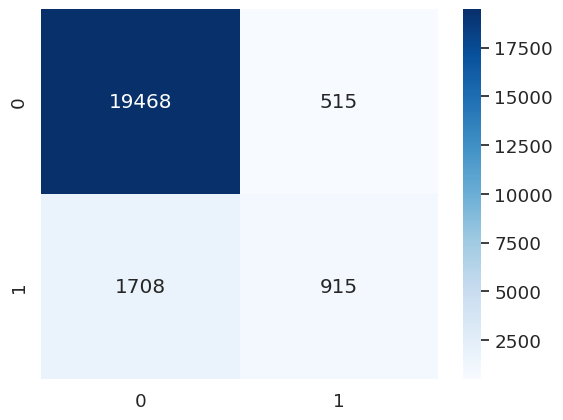

<ipython-input-129-af7ae731267a>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, feature_index], y_proba[:, 1], color='blue', edgecolors='k', marker='x', label="Predicted Probabilities")


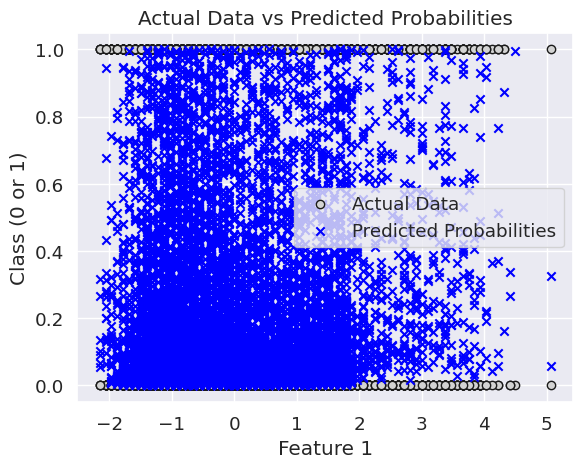

<ipython-input-129-af7ae731267a>:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, feature_index1], X_test_scaled[:, feature_index2], c=y_proba[:, 1], cmap='RdYlBu', edgecolors='k', marker='x', label="Predicted Probabilities")


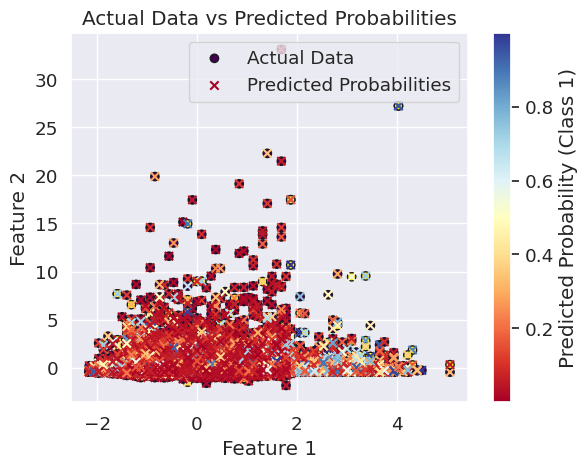

In [129]:
# Performance calculations and prediction visualization
print(f'Classification Report: {classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("Confusion Matrix")
plt.show()

# Prediction visualization  with 1 feature

feature_index = 0
y_proba = model.predict_proba(X_test_scaled)
plt.scatter(X_test_scaled[:, feature_index], y_test, color='lightgray', edgecolors='k', marker='o', label="Actual Data")
plt.scatter(X_test_scaled[:, feature_index], y_proba[:, 1], color='blue', edgecolors='k', marker='x', label="Predicted Probabilities")
plt.xlabel(f"Feature {feature_index + 1}")
plt.ylabel("Class (0 or 1)")
plt.title("Actual Data vs Predicted Probabilities")
plt.legend()
plt.show()

# Prediction visualization with 2 features

feature_index1 = 0
feature_index2 = 1
y_proba = model.predict_proba(X_test_scaled)
plt.scatter(X_test_scaled[:, feature_index1], X_test_scaled[:, feature_index2], c=y_test, cmap='viridis', edgecolors='k', marker='o', label="Actual Data")
plt.scatter(X_test_scaled[:, feature_index1], X_test_scaled[:, feature_index2], c=y_proba[:, 1], cmap='RdYlBu', edgecolors='k', marker='x', label="Predicted Probabilities")
plt.xlabel(f"Feature {feature_index1 + 1}")
plt.ylabel(f"Feature {feature_index2 + 1}")
plt.title("Actual Data vs Predicted Probabilities")
plt.colorbar(label="Predicted Probability (Class 1)")
plt.legend()
plt.show()


In [130]:
# Fine-tune hyperparameters (C value)
for c_value in [0.001, 0.01, 0.1, 1.0, 10.0]:
    model_tuned = LogisticRegression(C=c_value)
    model_tuned.fit(X_train_scaled, y_train)
    y_pred_tuned = model_tuned.predict(X_test_scaled)

    print(f"\nClassification Report for C={c_value}:\n{classification_report(y_test, y_pred_tuned)}")



Classification Report for C=0.001:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     19983
           1       0.69      0.24      0.35      2623

    accuracy                           0.90     22606
   macro avg       0.80      0.61      0.65     22606
weighted avg       0.88      0.90      0.88     22606


Classification Report for C=0.01:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     19983
           1       0.64      0.33      0.44      2623

    accuracy                           0.90     22606
   macro avg       0.78      0.65      0.69     22606
weighted avg       0.89      0.90      0.89     22606


Classification Report for C=0.1:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     19983
           1       0.64      0.35      0.45      2623

    accuracy                           0.90     22606
   macro avg       0.78